In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [3]:

df1=pd.read_csv("/home/sathish/Downloads/student.csv")
df1.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [4]:
df1.shape

(145, 16)

In [5]:
columns_to_impute=['Student_Age','Sex','High_School_Type','Sports_activity','Transportation','Weekly_Study_Hours','Attendance','Reading','Notes','Listening_in_Class','Project_work','Grade']
for i in columns_to_impute:
    print("how many unique value for ",i," : ",df1[i].nunique())

how many unique value for  Student_Age  :  9
how many unique value for  Sex  :  2
how many unique value for  High_School_Type  :  3
how many unique value for  Sports_activity  :  2
how many unique value for  Transportation  :  2
how many unique value for  Weekly_Study_Hours  :  4
how many unique value for  Attendance  :  4
how many unique value for  Reading  :  2
how many unique value for  Notes  :  3
how many unique value for  Listening_in_Class  :  3
how many unique value for  Project_work  :  2
how many unique value for  Grade  :  8


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1 = df1.drop(['Unnamed: 0', 'Id'], axis=1)

columns_to_encode = ['Sex','High_School_Type','Scholarship','Additional_Work','Sports_activity','Transportation','Attendance','Reading','Notes','Listening_in_Class','Project_work','Grade']

for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])

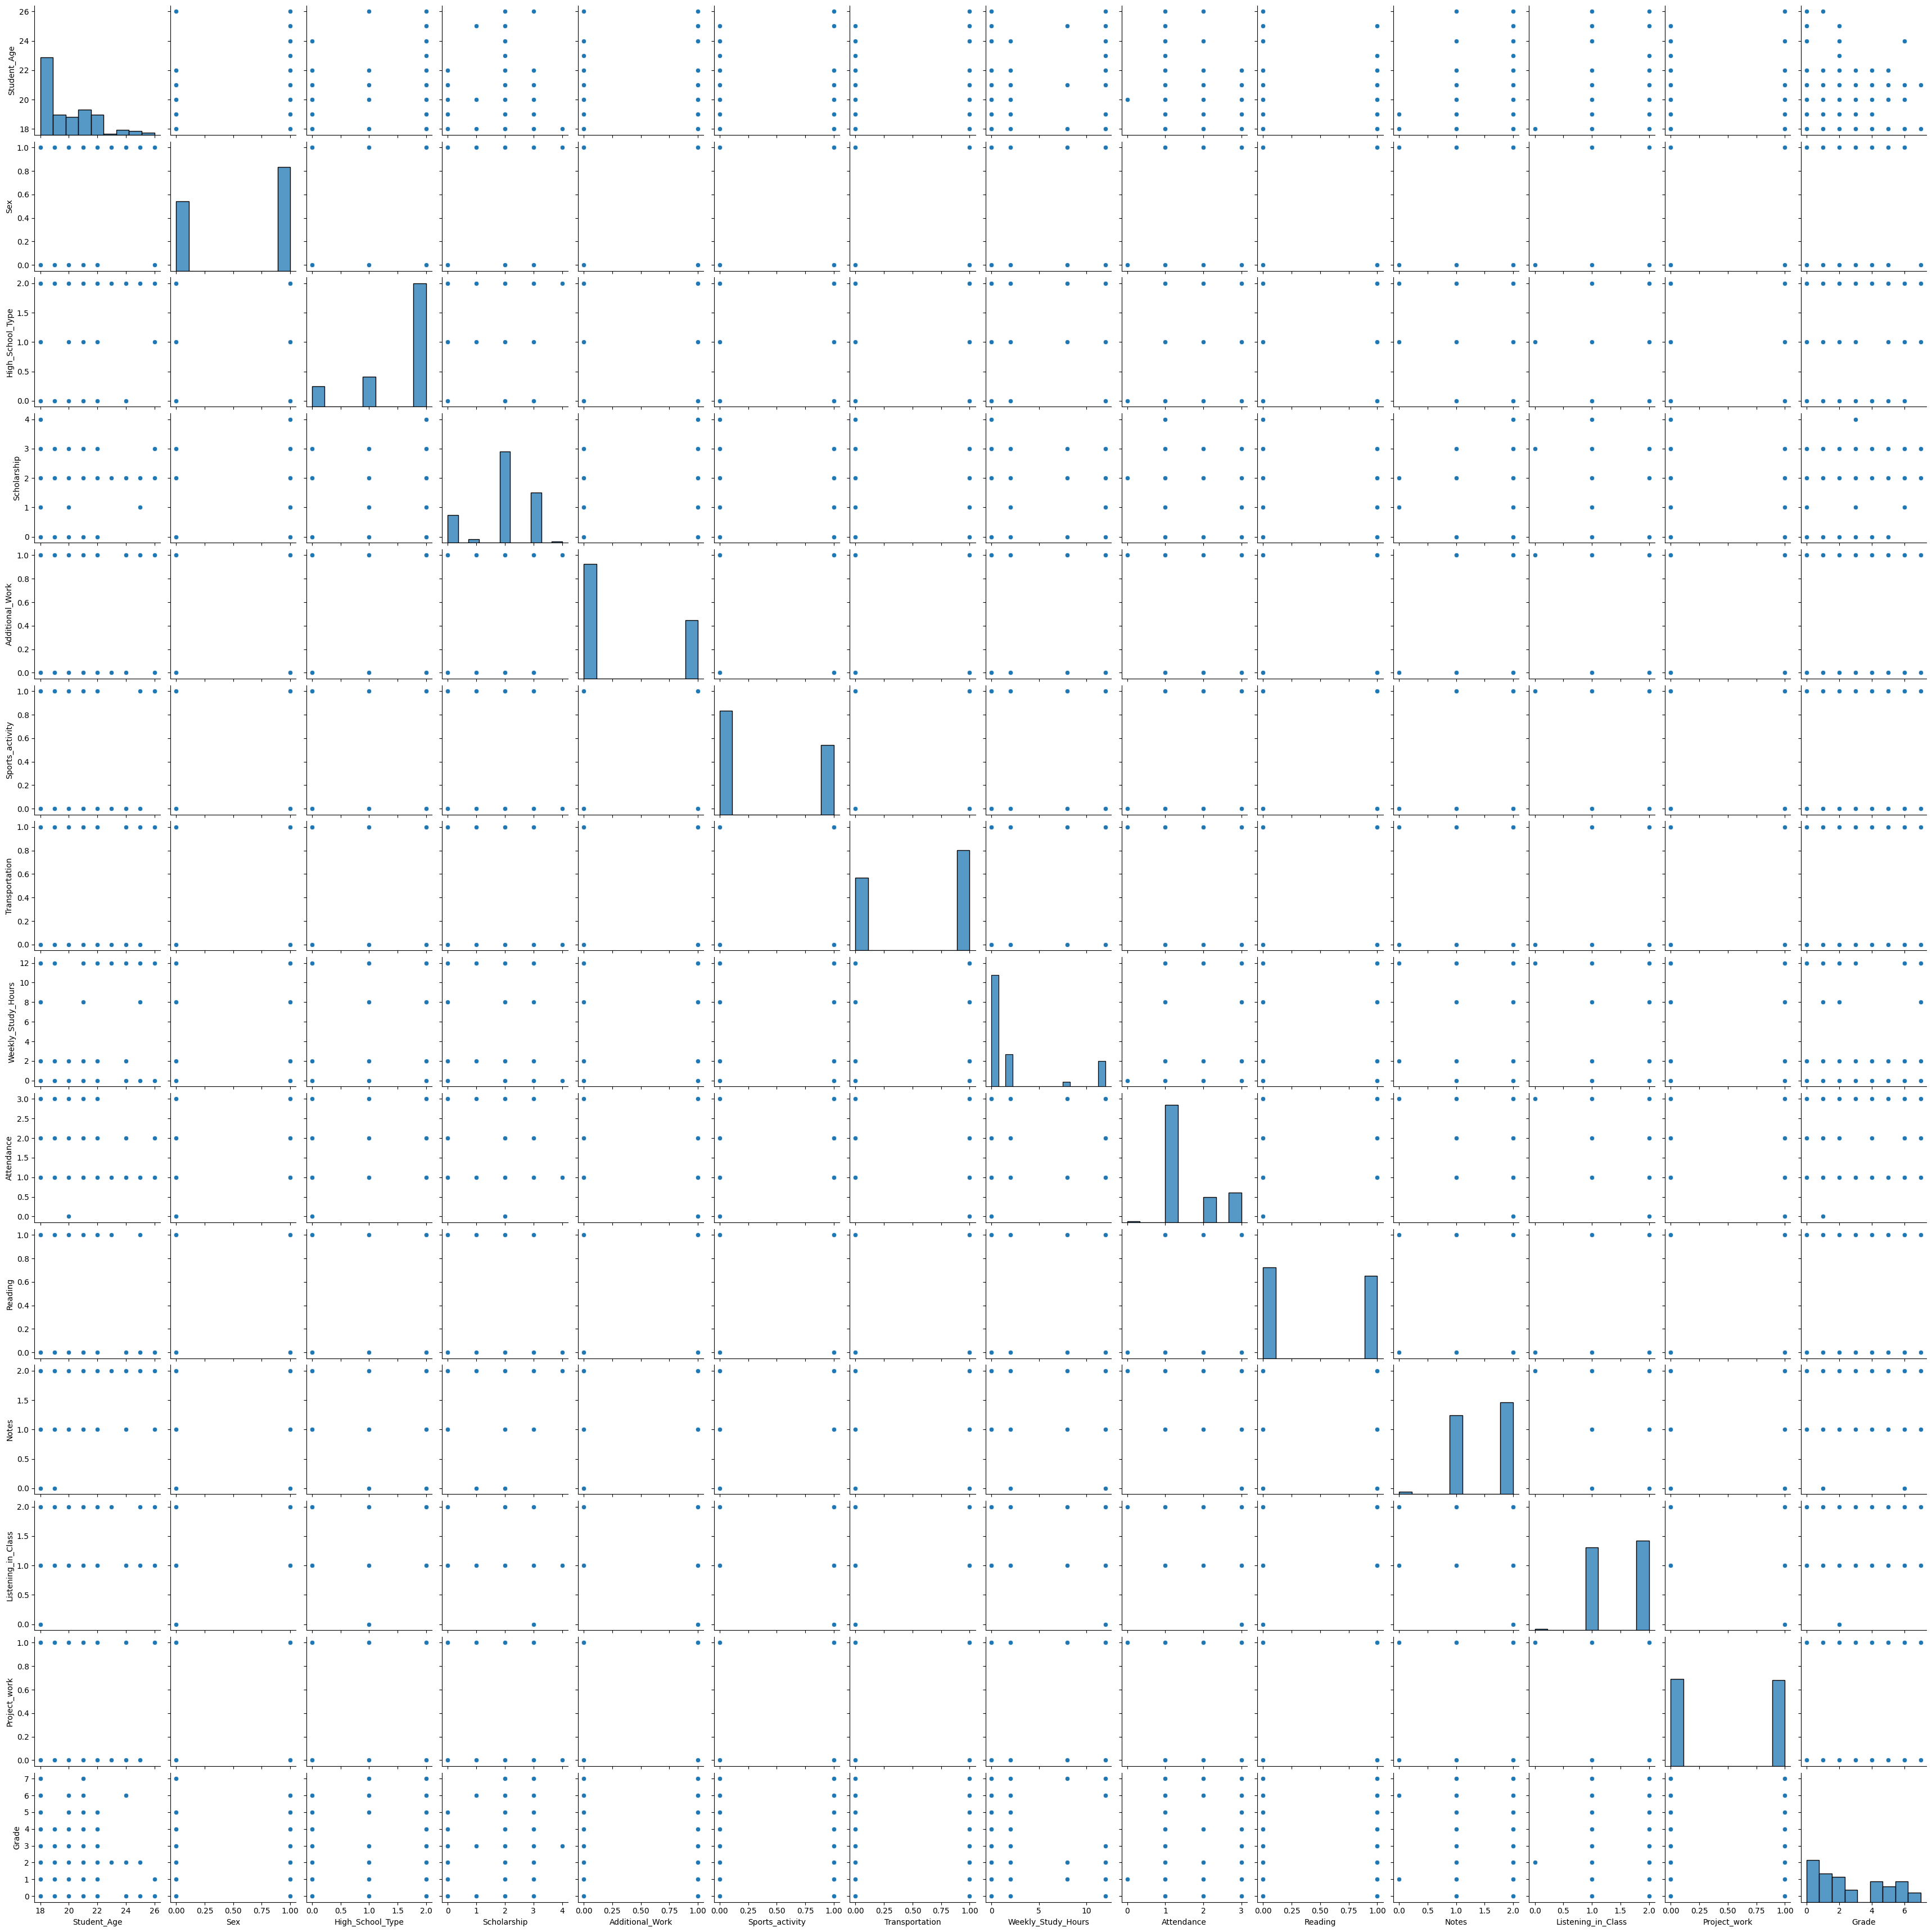

In [7]:
import seaborn as sns

sns.pairplot(df1)

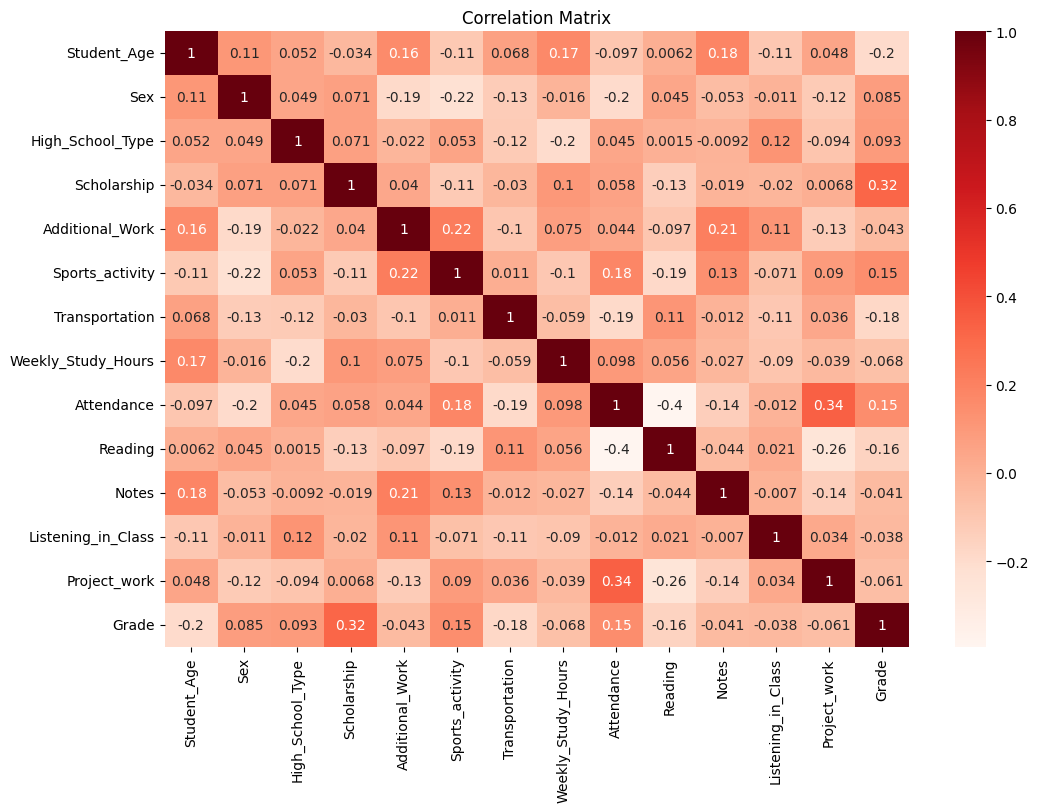

In [8]:
import matplotlib.pyplot as plt
correlation_matrix=df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

In [9]:
df1

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,1,0,2,1,0,1,0,1,1,2,1,0,0
1,20,1,0,2,1,0,1,0,1,1,1,2,1,0
2,21,1,2,2,0,0,1,2,2,0,1,1,1,0
3,18,0,1,2,1,0,0,2,1,0,2,1,0,0
4,22,1,1,2,0,0,0,12,1,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,22,0,2,2,1,1,1,0,1,0,2,1,1,4
141,18,0,2,3,0,0,1,0,2,0,2,2,0,4
142,18,0,1,3,0,0,1,0,1,1,1,1,0,0
143,22,0,2,3,1,1,0,12,3,0,2,1,1,3


In [10]:
# split dataset
x = df1[['Student_Age','Sex','High_School_Type','Sports_activity','Weekly_Study_Hours','Attendance','Reading','Notes','Listening_in_Class','Project_work','Grade']]
y = df1.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
140    4
141    4
142    0
143    3
144    2
Name: Grade, Length: 145, dtype: int64

In [12]:
knn=KNeighborsClassifier()

param_grid={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}

In [13]:
grid_search=GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [14]:
best_params=grid_search.best_params_
print("Best Hyperparameters:",best_params)

Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}


In [15]:
best_knn=KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],weights=best_params['weights'])

best_knn.fit(x_train,y_train)

y_pred=best_knn.predict(x_test)
y_pred

array([1, 4, 4, 0, 5, 1, 1, 2, 2, 4, 1, 5, 0, 5, 4, 0, 4, 6, 6, 3, 6, 0,
       1, 0, 0, 1, 0, 0, 6])

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print("Accuracy:", accuracy)
print("Confusion_matrix:\n",confusion)
print("classification report:\n",classification_rep)

Accuracy: 0.7241379310344828
Confusion_matrix:
 [[7 0 0 0 0 0 0 0]
 [0 4 1 0 0 0 0 0]
 [1 2 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 1 2 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 1 1 0]]
classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.67      0.80      0.73         5
           2       0.50      0.25      0.33         4
           3       1.00      0.50      0.67         2
           4       0.60      1.00      0.75         3
           5       0.67      0.67      0.67         3
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         2

    accuracy                           0.72        29
   macro avg       0.63      0.65      0.62        29
weighted avg       0.67      0.72      0.68        29



/home/sathish/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sathish/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sathish/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
